# Gas Meter Digit Recognition

## Convolutional Neural Network

## Importing Libraries

In [1]:
# General libraries
import pickle
import numpy as np
import scipy.io as sio
import timeit
import copy 
import matplotlib.pyplot as plt
%matplotlib inline
import copy 

# Keras libraries
from keras.layers import Dense
#Dense(units, # Number of output neurons
#activation=None, # Activation function by name
#use_bias=True, # Use bias term or not
#kernel_initializer='glorot_uniform',
#bias_initializer='zeros')
from keras.layers import Dropout
#Dropout(rate, # Fraction of units to drop
#seed=None) # Random seed for reproducibility
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten
from keras.callbacks import Callback
import tensorflow as tf


batch_size = 128
num_classes = 10
epochs = 20


C:\Programme\Programmierung\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

In [3]:
# Get datasets from http://ufldl.stanford.edu/housenumbers/
# Execute only once
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


## Data Preparation

In [2]:
# Loading the training and testing data

#image_ind = 10
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# access to the dict
x_train = train_data['X']
y_train = train_data['y']
x_test = test_data['X']
y_test = test_data['y']



## Data Exploration

In [64]:
#np.save('x_train.npy', x_train)

In [65]:
#d = np.load('x_train.npy')
#d.shape

(32, 32, 3, 73257)

(32, 32, 3, 73257)
(73257, 1)


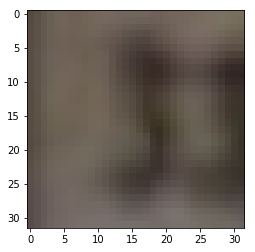

[3]


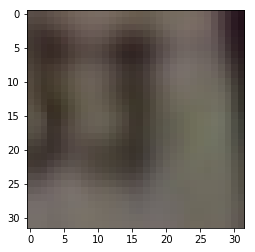

[3]


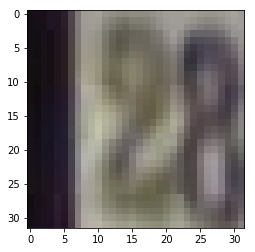

[2]


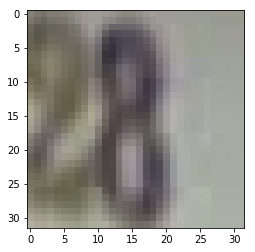

[8]


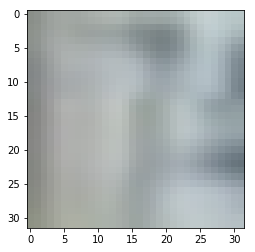

[7]


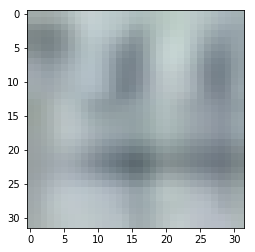

[4]


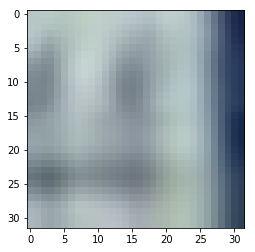

[4]


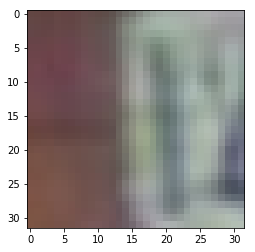

[1]


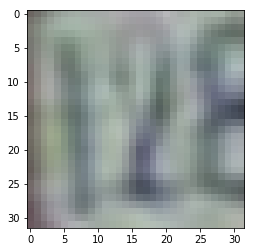

[2]


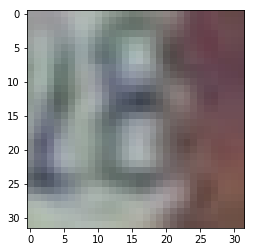

[8]


In [3]:
# show sample array shape
print (x_train.shape)
print (y_train.shape)

# show sample image
for i in range(10, 20):
    plt.imshow(x_train[:,:,:,i])
    plt.show()
    print (y_train[i])

In [4]:
# Print a diagram of the distribution of values
def printFrequencyDistribution(y_train_values, y_test_values,number_labels):
    test_value_distribution = valueDistribution(y_test_values)
    train_value_distribution = valueDistribution(y_train_values)
    #test_value_distribution = np.unique(y_test_values, return_counts=True)
    #train_value_distribution = np.unique(y_train_values, return_counts=True)
    ind = np.arange(number_labels) 

    plt.bar(ind, train_value_distribution[1], align='center', color='blue', label='Training Labels')
    plt.bar(ind, test_value_distribution[1], align='center', color='red', label='Testing Labels')
    plt.legend()
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Label Occurences')
    plt.title('Frequency Distribution of Class Labels')
    plt.show()
    plt.show()
    print (train_value_distribution)

 

In [5]:
# number of values for each class
def valueDistribution(values):
    return np.unique(values, return_counts=True)

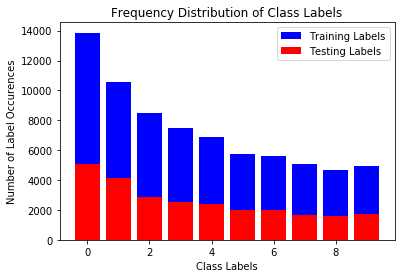

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8), array([13861, 10585,  8497,  7458,  6882,  5727,  5595,  5045,  4659,
        4948], dtype=int64))


In [6]:

printFrequencyDistribution(y_train, y_test,num_classes)     
    

#train_min = np.min(train_value_distribution[1])
#print (train_min)

## Extract

In [7]:
# Select an equal number of samples from both x_values and y_values
def valueSelection(x_values,y_values,cut):
    selector = np.ones((len(y_values)), dtype=bool)
    selector[0:10]
    for ind in range(0,11):
        sel =y_values[:,0]==ind
        sel[np.argwhere(sel)[:cut]]=0
        selector[sel] = 0
    y_selection=y_values[selector]
    x_selection=x_values[:,:,:,selector]
    return (x_selection,y_selection)


## Transform

In [8]:
# cutting the left cut_begin columns and the right cut_end columns of the four dimensional values array [rows,columns,colours, no. of samples]  
def cuttingValues(values,cut_begin,cut_end):
    left_end= values.shape[1]-cut_end
    result = values[:,cut_begin:left_end,:,]
    return result

In [9]:
# getting narrower datasets
# execute only once
x_train_cut = cuttingValues (x_train,5,5)
x_test_cut = cuttingValues (x_test,5,5)
print (x_train_cut.shape)
print (x_test_cut.shape)
print (y_train.shape)
print (y_test.shape)

(32, 22, 3, 73257)
(32, 22, 3, 26032)
(73257, 1)
(26032, 1)


In [10]:
# getting an equal number of values for each class
train_min = np.min(valueDistribution(y_train)[1])
test_min = np.min(valueDistribution(y_test)[1])

# reduced number of classes
#train_min = 2000
#test_min = 1500
x_train_small,y_train_small=valueSelection(x_train_cut,y_train,train_min)
x_test_small,y_test_small=valueSelection(x_test_cut,y_test,test_min)
print (train_min)
print (x_train_small.shape)
print (y_train_small.shape)

4659
(32, 22, 3, 46590)
(46590, 1)


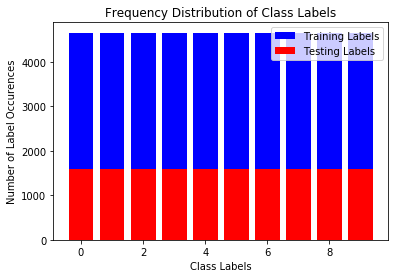

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8), array([4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659, 4659],
      dtype=int64))


In [11]:

printFrequencyDistribution(y_train_small,y_test_small,num_classes) 

In [12]:
# show dataset info
print ('Reduced train data: ', x_train_small.shape)
print ('Reduced test data: ', x_test_small.shape)
number_train=len(y_train_small)
number_test=len(y_test_small)
print('Number train data samples: ', number_train)
print('Number test data samples: ', number_test)


Reduced train data:  (32, 22, 3, 46590)
Reduced test data:  (32, 22, 3, 15950)
Number train data samples:  46590
Number test data samples:  15950


## Feature Creation

In [13]:
train_data = x_train_small.astype('float32') / 256
test_data = x_test_small.astype('float32') / 256

# reshaping np array so that we can access data in CNN friendly format i.e. [i,:,:,:] from [:,:,:,i]
train_data = np.transpose(train_data, (3, 0, 1, 2))
test_data = np.transpose(test_data,(3, 0, 1, 2))

#changing class labels range 1-10 to 0-9
y_train_small[y_train_small == 10] = 0
y_test_small[y_test_small == 10] = 0

# processing labels in CNN friendly format i.e. 1-hot-encoding

train_labels = to_categorical(y_train_small[:,0])
test_labels = to_categorical(y_test_small[:,0])
#train_labels = (np.arange(num_classes) == train_labels[:, None]).astype(np.float32)
#test_labels = (np.arange(num_classes) == test_labels[:, None]).astype(np.float32)

print ('Train data:', train_data.shape,', Train labels:', train_labels.shape)
print ('Test data:', test_data.shape,', Test labels:', test_labels.shape)

Train data: (46590, 32, 22, 3) , Train labels: (46590, 10)
Test data: (15950, 32, 22, 3) , Test labels: (15950, 10)


## Model Definition
### Convolutional Network Model

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 22,3),data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
#model.add(Activation('sigmoid'))
model.add(Activation(tf.nn.softmax))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 20, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 20, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                307264    
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#              metrics=['mse'])
#              metrics=['categorical_crossentropy'])

In [17]:
train_data.shape

(46590, 32, 22, 3)

## Model Training

In [19]:
import timeit

start = timeit.default_timer()

epochs=1
batch_size=44
result= model.fit(train_data, train_labels, batch_size=batch_size,
          epochs=epochs, validation_data=(test_data, test_labels))
stop = timeit.default_timer()

print('Time: ', stop - start)  

Train on 46590 samples, validate on 15950 samples
Epoch 1/1
46590/46590 [==============================] - 20s 431us/step - loss: 0.8672 - acc: 0.6904 - val_loss: 0.7537 - val_acc: 0.7718
Time:  20.086948237442925


In [20]:
print (result)

Text(0.5,1,'Accuracy Curves')

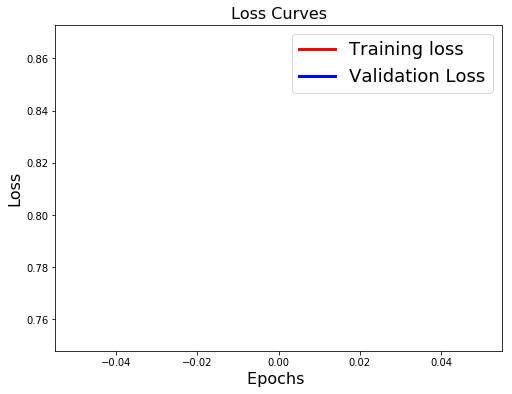

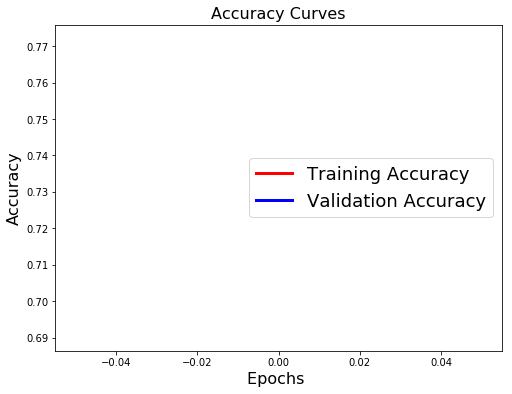

In [21]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['loss'],'r',linewidth=3.0)
plt.plot(result.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['acc'],'r',linewidth=3.0)
plt.plot(result.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [22]:
print (result.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## Model Evaluation

In [23]:
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7536516019244179
Test accuracy: 0.7718495297656164


In [24]:
np.set_printoptions(linewidth=180)

(15950, 10)
Correct Values: [5 2 1 0 6 1 9 1 1 8 3 6 5 1 4 4 1 6 3 4 2 0 1 3 2 5 4 1 4 2]
Prediction:     [5 2 1 0 6 1 9 1 1 8 3 6 5 1 4 4 1 6 3 4 2 0 1 9 2 5 4 1 4 4]
[[1.45188424e-05 7.53413678e-06 5.90478408e-07 2.44537741e-01 1.20886207e-05 7.08211422e-01 2.00808477e-02 3.50564113e-03 3.14478716e-03 2.04848424e-02]
 [1.63824367e-03 1.95048412e-03 9.67276752e-01 2.86564813e-04 5.52153541e-03 1.15044259e-05 1.37122083e-06 7.41720572e-03 7.32299086e-05 1.58230998e-02]
 [2.82661989e-04 6.84682071e-01 5.75462764e-04 6.71438058e-04 2.99412757e-01 8.79284053e-05 7.56411767e-03 8.25829396e-04 5.71294129e-03 1.84985824e-04]
 [8.54348361e-01 8.55226722e-03 2.32874881e-04 1.41316431e-03 1.35115202e-04 1.66986219e-03 6.47595227e-02 2.17884034e-03 3.02495845e-02 3.64604592e-02]
 [1.06432870e-01 1.31283160e-02 6.49114896e-04 2.83927731e-02 7.30644399e-03 1.27285689e-01 4.42892492e-01 1.53942425e-02 2.19600990e-01 3.89170237e-02]
 [1.72657430e-01 7.82974780e-01 6.89966255e-04 7.85896380e-04 1.723

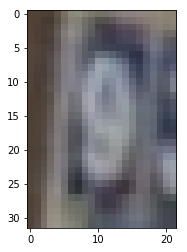

[9]


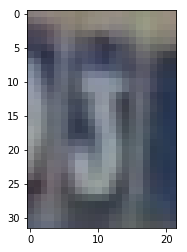

[3]


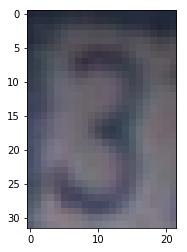

[3]


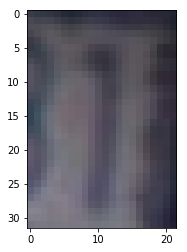

[1]


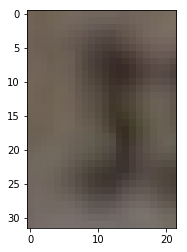

[3]


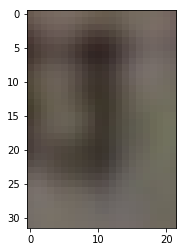

[3]


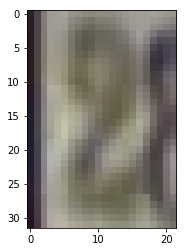

[2]


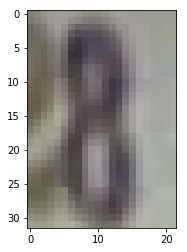

[8]


In [25]:
# Prediction on small amount of images with individual prediction results and images shown for seeing image quality and assessing prediction difficulty

Xnew = test_data.reshape((704*3,-1)).T
print (test_labels.shape)
test_labels_small =y_test_small[:,0]

out2 = model.predict(test_data[0:30])
#y =y_test_small.reshape([-1])
print ('Correct Values:',test_labels_small[0:30])
print ('Prediction:    ',np.argmax(out2, axis=1))
print (out2[:15])

for i in range(6, 14):
    plt.imshow(x_train_small[:,:,:,i])
    plt.show()
    print (y_train_small[i])


## Saving model

In [49]:
import copy 
modelbackup = copy.deepcopy(model)

In [50]:
# Pickle model 
# adjust model name if required
pickle.dump(model, open('modelCNN.pck','wb'))


In [18]:
# Load model if required
model = pickle.load( open( "modelCNN.pck", "rb" ) )

In [26]:
!ls


a2_m1.json
a2_m1.json.zip
a2_m1.json.zip.base64
a2_m2.json
a2_m2.json.zip
a2_m2.json.zip.base64
a2_m3.json
a2_m3.json.zip
a2_m3.json.zip.base64
a2_m4.json
a2_m4.json.zip
a2_m4.json.zip.base64
a_pivftl_anything.log
coursera.key
coursera.key.pub
dl4j-quickstart-1.0-SNAPSHOT-jar-with-dependencies.jar
Freq_Dist.png
Frequency Distribution.png
HMP_Dataset
iris.txt
MNIST_data
model.h5
model.h5.base64
model.pck
modelv10.pck
modelv11.pck
modelv12.pck
modelv2.pck
modelv3.pck
modelv8_2.pck
modelv8.pck
modelvBasicNN1.pck
modelvBasicNN2.pck
modelvCNN1.pck
modelvCNN2.pck
modelvCNNsoftmax2.pck
modelvML1.pck
numbers
OpenBLAS-0.2.20
__pycache__
rklib.py
rklib.pyc
scratch_space
sequential_1_model.proto
sequential_1_model_solver.proto
test_32x32.mat
test_32x32.mat.1
test_32x32.mat.2
test_32x32.mat.3
train_32x32.mat
train_32x32.mat.1
train_32x32.mat.2
train_32x32.mat.3
train.tar.gz
v0.2.20.tar.gz
watsoniotp.broken.pickle
watsoniotp.healthy.pickle
weights_dir
x_images.pck
x_train.npy
y_images.pck


## Model Validation with Meter Digits
### Loading and preparing image data from object storage

In [ ]:
# Load model locally
x_images = pickle.load( open( "x_images.pck", "rb" ) )
y_images = pickle.load( open( "y_images.pck", "rb" ) )
#print (y_images)
#print (x_images[1])

In [210]:
######## DO NOT USE WITH EXTERNAL ACCESS ######## 
# Object Storage access info deactivated for external use
# Connecting Object Storage
#import types
#import pandas as pd
#from ibm_botocore.client import Config
#import ibm_boto3
#import zipfile
#import io
#from io import BytesIO
#import matplotlib.image as mpimg




#def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
#client_657e3440eec1432ea8c6fca46c01a8bd = ibm_boto3.client(service_name='s3',
#    ibm_api_key_id='gA2L_KgkSgJeHwoX8lYe0OfD399fy9O28legTb-kvbbk',
#    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
#    config=Config(signature_version='oauth'),
#    endpoint_url='https://s3.us-south.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
#streaming_body_2 = client_657e3440eec1432ea8c6fca46c01a8bd.get_object(Bucket='images-datacatalog-byxackvzn', Key='data_asset/Data_Hk6Qarvz4.zip')['Body']
#add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 

#zip_ref=zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')

In [161]:
# For use with object storage validation images file
#width = 22
#height = 32

#val_image=[]
#image_names=[]
#image_names=np.array(zip_ref.namelist())
#print (image_names)
#x_images_list=[]
#y_images_list=[]
#for img in zip_ref.namelist():
#    img2 = Image.open(zip_ref.open(img))
#    img3 = img2.resize((width, height), Image.BILINEAR)
#    img4 = np.asarray(img3)
#    x_images_list.append(img4)
#    y_images_list.append(int(img[0]))

#x_images = np.array(x_images_list)
#y_images = np.array(y_images_list)
x_images = np.transpose(x_images, (1,2,3, 0))
#print (y_images)
#print (x_images[1])

['0-001.png' '0-002.png' '0-003.png' '0-004.png' '0-005.png' '0-006.png' '0-007.png' '0-008.png' '0-009.png' '0-010.png' '0-012.png' '0-013.png' '0-014.png' '1-001.png' '1-002.png'
 '1-003.png' '1-004.png' '1-005.png' '1-006.png' '1-007.png' '1-008.png' '1-009.png' '1-010.png' '1-011.png' '1-012.png' '1-013.png' '1-014.png' '2-001.png' '2-002.png' '2-003.png'
 '2-004.png' '3-001.png' '3-002.png' '3-003.png' '4-001.png' '4-002.png' '5-001.png' '5-002.png' '5-003.png' '6-001.png' '6-002.png' '6-003.png' '6-004.png' '6-005.png' '6-006.png'
 '6-007.png' '6-008.png' '6-009.png' '6-010.png' '6-011.png' '7-001.png' '9-001.png' '9-002.png' '9-003.png' '9-004.png' '9-005.png' '9-006.png' '9-009.png' '9-010.png' '9-011.png'
 '9-012.png']
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 3 3 4 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 9 9 9 9 9 9 9 9 9 9]


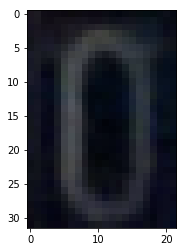

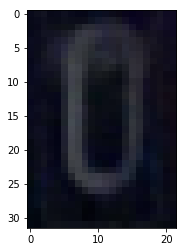

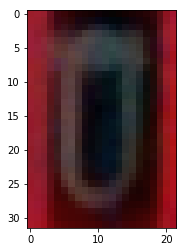

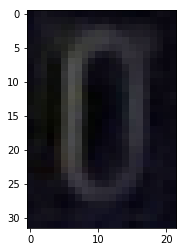

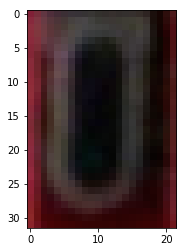

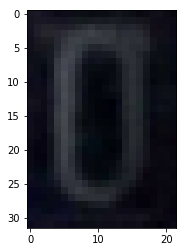

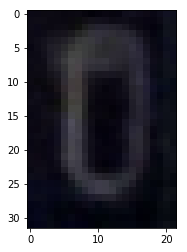

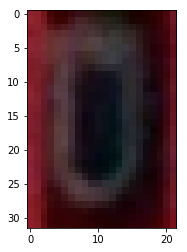

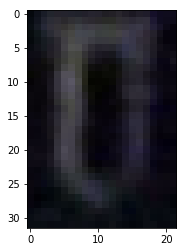

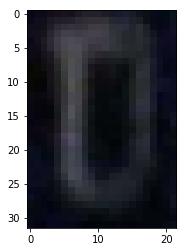

In [60]:
for ind in range(10):
    
    plt.imshow(x_images[ind])
    plt.show()

## Model Validation

In [228]:
# Preparing validation data for model
x_images = x_images.astype('float32')
x_images_three_dim= x_images.reshape(704,3,-1)
x_images2 = x_images_three_dim.astype('float32')

x_images2 /= 256
x_images2 = 1-x_images2
print (x_images.shape)
print (x_images_three_dim.shape)
Xnew =x_images2.reshape((704*3,-1)).T
print (Xnew.shape)


(32, 22, 3, 61)
(704, 3, 61)
(61, 2112)


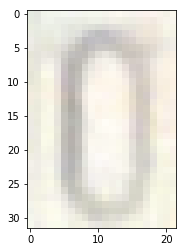

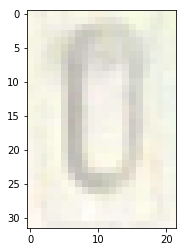

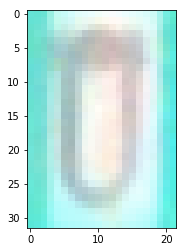

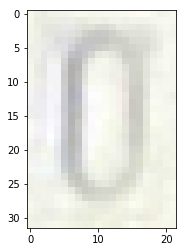

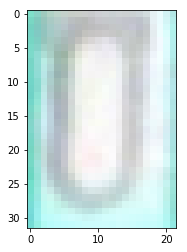

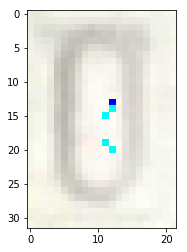

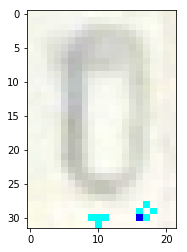

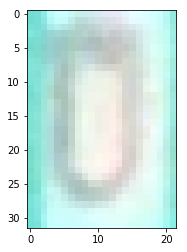

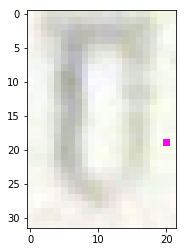

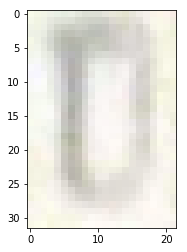

In [214]:

for ind in range(10):
    plt.imshow(x_images[:,:,:,ind])

    plt.show()

In [230]:
out2 = model.predict(val_data)
y =y_images.reshape([-1])

#score = model.evaluate(train_data, y_images, verbose=0)
PREDICTED_CLASSES = model.predict_classes(val_data, batch_size=44, verbose=1)
temp = sum(y_images == PREDICTED_CLASSES)
print ('Accuracy:      ',temp/len(y_images))

print ('Correct Values:',y_images)
print ('Prediction:    ',np.argmax(out2, axis=1))
# uncomment for detailed prediction results
print (out2[:])

61/61 [==============================] - 0s 49us/step
Accuracy:       0.918032786885
Correct Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 3 3 4 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 9 9 9 9 9 9 9 9 9 9]
Prediction:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 7 1 1 1 1 2 2 2 2 3 5 5 4 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 3 9 9 9 9 9 3 9 9 9 9]
[[  9.53298688e-01   5.42869978e-03   4.74749366e-04   1.40410484e-04   8.84109829e-03   3.63086991e-04   2.46660095e-02   5.55150444e-04   3.14355223e-03   3.08844750e-03]
 [  8.76526296e-01   1.11829052e-02   3.95790860e-03   1.74761412e-03   5.22496440e-02   2.42210715e-03   3.11620850e-02   3.70920380e-03   4.99744760e-03   1.20448368e-02]
 [  9.46979403e-01   8.42644833e-03   4.23246669e-03   1.17742771e-03   2.04851199e-03   2.19004974e-03   1.01759396e-02   8.60667415e-03   2.95633753e-03   1.32067390e-02]
 [  9.63890314e-01   3.52495187e-03   1.30990078e-03   3.63203144e-04   8.29610974e-03   7.80458155e-04   1.41564514